In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris


In [10]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Extract features
X = df.drop('target', axis=1)
y = iris.target

In [14]:
df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64>

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
classifier = tree.DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [42, 36, 42]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 0.996\nsamples = 78\nvalue = [0, 36, 42]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.544\nsamples = 40\nvalue = [0, 35, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text

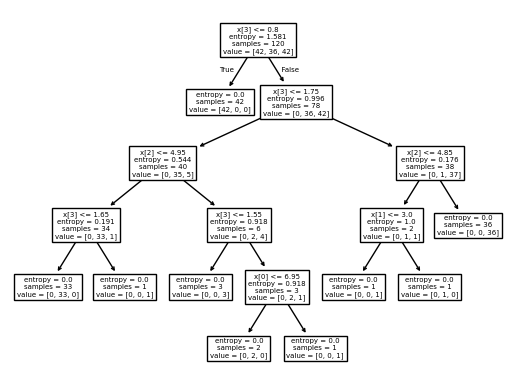

In [33]:
tree.plot_tree(classifier)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array([0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 2])

In [36]:
y_test

array([0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 2])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
import graphviz

decision_tree = tree.export_graphviz(decision_tree= classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, out_file='tree.dot')

In [48]:
! dot -Tpng tree.dot -o tree.png